In [1]:
pip install keras==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import random
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import SGD, Adam, AdamW, Adamax, Adagrad
from sklearn.decomposition import PCA
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, multilabel_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
# Reading the CSV file
Data_df = pd.read_csv("variables_clean.csv")
Data_df.head()

,Bracket,Nivel Socioeconómico,"Si estas en esquina, que tipo de esquina es. ¿Esquina corta o larga? Considera lo siguiente",Si estas en esquina. ¿De qué lado te encuentras respecto al conductor de un automóvil? Manejando por la avenida con el flujo principal,¿Es la esquina donde queremos estar?,¿Consideras que es la zona donde queremos estar?,¿Es el crucero donde queremos estar?,¿Consideras que es el mejor layout que podremos tener?,Te encuentras en alguna de estas opciones,¿Cuentas con una parada de transporte público en tu tienda?,...,Accesibilidad Vehicular,Valor Accesibilidad Vehicular,Valor Accesibilidad Vehicular Texto,Accesibilidad Peatonal,Valor Accesibilidad Peatonal,Valor Accesibilidad Peatonal Texto,Tipo de Calle,Visibilidad General,Valor Visibilidad,Estrategia
0,Mid,C-,Preferente / Far Corner,Izquierda,Sí,Sí,Sí,No,Centro de Colonia,No,...,Bueno (Mayor a 10 metros de maniobra para entr...,4.0,Bueno,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Secundaria (20-40 kmh),Buena,4.0,Optimizar / Agregar atributos adicionales
1,Top,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,Sí,Entrada a Colonia,Sí,...,Excelente (Mayor a 15 metros de maniobra para ...,5.0,Excelente,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener
2,Top,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,Sí,Centro de Colonia,No,...,Regular (De 5 a 10 metros de maniobra para ent...,3.0,Regular,Regular (Llego de una buena manera a la tienda...,2.0,Regular,Calle de Colonia (Menor a 20 kmh),Regular,3.0,Operar-mantener
3,Top,C,Corta/ Short Corner,Derecha,Sí,Sí,Sí,No,Centro de Colonia,Sí,...,Bueno (Mayor a 10 metros de maniobra para entr...,4.0,Bueno,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener
4,Mid,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,No,Fondo de Colonia,No,...,Regular (De 5 a 10 metros de maniobra para ent...,3.0,Regular,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener


In [5]:
# Removal of rows with value "Average" on the column "Bracket" for data cleaning
Data_df = Data_df[Data_df['Bracket'] != 'Average']
Data_df = Data_df.reset_index(drop=True)
df_cleaner=Data_df

In [6]:
# Display the modified DataFrame
df_cleaner.head()

,Bracket,Nivel Socioeconómico,"Si estas en esquina, que tipo de esquina es. ¿Esquina corta o larga? Considera lo siguiente",Si estas en esquina. ¿De qué lado te encuentras respecto al conductor de un automóvil? Manejando por la avenida con el flujo principal,¿Es la esquina donde queremos estar?,¿Consideras que es la zona donde queremos estar?,¿Es el crucero donde queremos estar?,¿Consideras que es el mejor layout que podremos tener?,Te encuentras en alguna de estas opciones,¿Cuentas con una parada de transporte público en tu tienda?,...,Accesibilidad Vehicular,Valor Accesibilidad Vehicular,Valor Accesibilidad Vehicular Texto,Accesibilidad Peatonal,Valor Accesibilidad Peatonal,Valor Accesibilidad Peatonal Texto,Tipo de Calle,Visibilidad General,Valor Visibilidad,Estrategia
0,Mid,C-,Preferente / Far Corner,Izquierda,Sí,Sí,Sí,No,Centro de Colonia,No,...,Bueno (Mayor a 10 metros de maniobra para entr...,4.0,Bueno,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Secundaria (20-40 kmh),Buena,4.0,Optimizar / Agregar atributos adicionales
1,Top,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,Sí,Entrada a Colonia,Sí,...,Excelente (Mayor a 15 metros de maniobra para ...,5.0,Excelente,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener
2,Top,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,Sí,Centro de Colonia,No,...,Regular (De 5 a 10 metros de maniobra para ent...,3.0,Regular,Regular (Llego de una buena manera a la tienda...,2.0,Regular,Calle de Colonia (Menor a 20 kmh),Regular,3.0,Operar-mantener
3,Top,C,Corta/ Short Corner,Derecha,Sí,Sí,Sí,No,Centro de Colonia,Sí,...,Bueno (Mayor a 10 metros de maniobra para entr...,4.0,Bueno,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener
4,Mid,C-,Corta/ Short Corner,Derecha,Sí,Sí,Sí,No,Fondo de Colonia,No,...,Regular (De 5 a 10 metros de maniobra para ent...,3.0,Regular,Bueno (Puedo llegar caminando sin algún tipo d...,3.0,Bueno,Calle Principal (40-60 kmh),Buena,4.0,Operar-mantener


In [7]:
df_cleaner["Bracket"].value_counts()


Mid       34
Top       13
Bottom     5
Name: Bracket, dtype: int64

In [9]:
df_numerical = pd.get_dummies(df_cleaner)


In [10]:
df_numerical.fillna(0, inplace=True)

# Display the modified DataFrame
df_numerical.head()

,Ahora validaremos datos sobre el entorno de la tienda. Apoyanos contestando las siguientes preguntas..,Ninguno,Industria,7-Eleven,BAE,OXXO,Six,Bodega SuMerca,Modelorama,Mi Bodeguita,...,Tipo de Calle_Calle Principal (40-60 kmh),Tipo de Calle_Calle Secundaria (20-40 kmh),Tipo de Calle_Calle de Colonia (Menor a 20 kmh),Visibilidad General_Buena,Visibilidad General_Excelente,Visibilidad General_Mala,Visibilidad General_Regular,Estrategia_Operar-mantener,Estrategia_Optimizar / Agregar atributos adicionales,Estrategia_Reubicar
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,1,0,0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0


In [11]:
df_numerical.shape


(52, 214)

In [12]:
# Split our preprocessed data into our features and target arrays
y = df_numerical[['Bracket_Top', 'Bracket_Mid', 'Bracket_Bottom']]
X = df_numerical.drop(columns=['Bracket_Top', 'Bracket_Mid', 'Bracket_Bottom'])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


# KNN




In [13]:
# Instantiate the model with k = 3 neighbors
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [14]:
# Train the model
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Create predictions
y_pred = KNN_model.predict(X_test)

# Review the predictions
y_pred

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [16]:
# Calculate multilabel confusion matrix
conf_matrix_knn = multilabel_confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_knn)

Confusion Matrix:
[[[10  3]
  [ 2  1]]

 [[ 1  2]
  [ 3 10]]

 [[16  0]
  [ 0  0]]]


In [17]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6875


In [18]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69        16
   macro avg       0.37      0.36      0.36        16
weighted avg       0.66      0.69      0.67        16
 samples avg       0.69      0.69      0.69        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [23]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [24]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [26]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.75


In [ ]:
# Calculate multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[[13  0]
  [ 3  0]]

 [[ 2  1]
  [ 1 12]]

 [[16  0]
  [ 0  0]]]


In [ ]:
# Displaying results
for i in range(len(conf_matrix)):
    print(f"Confusion Matrix for Label {i}:")
    print(pd.DataFrame(conf_matrix[i], index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
    print()

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Displaying accuracy score
print(f"Accuracy Score: {acc_score}")
# Calculate classification report with zero_division parameter
report = classification_report(y_test, y_pred, zero_division=1)
# Displaying classification report
print("Classification Report:")
print(report)
#print(classification_report(y_test, y_pred))


Confusion Matrix for Label 0:
          Predicted 0  Predicted 1
Actual 0           13            0
Actual 1            3            0

Confusion Matrix for Label 1:
          Predicted 0  Predicted 1
Actual 0            2            1
Actual 1            1           12

Confusion Matrix for Label 2:
          Predicted 0  Predicted 1
Actual 0           16            0
Actual 1            0            0

Accuracy Score: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         0

   micro avg       0.92      0.75      0.83        16
   macro avg       0.97      0.64      0.64        16
weighted avg       0.94      0.75      0.75        16
 samples avg       0.94      0.75      0.75        16



In [ ]:
# Create a StandardScaler instances
#scaler = StandardScaler()

# Fit the StandardScaler
#X_scaler = scaler.fit(X_train)

# Scale the data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

# We decided against the use of the scaler because it reduced the accuracy on the models

# Neural Networks

# SDG

In [ ]:
stores_model = Sequential()

stores_model.add(Dense(30, input_dim=211, activation='softmax'))
stores_model.add(Dense(10, activation='softmax'))
stores_model.add(Dense(3, activation='softmax'))
sgd = SGD()

stores_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
stores_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 30)                6360      
                                                                 
 dense_126 (Dense)           (None, 10)                310       
                                                                 
 dense_127 (Dense)           (None, 3)                 33        
                                                                 
Total params: 6,703
Trainable params: 6,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model_sdg = stores_model.fit(X_train, y_train,batch_size=6, validation_split=0.3, epochs=200)


In [ ]:

# Evaluate the model using the test data
model_loss, model_accuracy = stores_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


1/1 - 0s - loss: 0.6069 - accuracy: 0.8125 - 24ms/epoch - 24ms/step
Loss: 0.6069000363349915, Accuracy: 0.8125


# Optimizing the model

# Adam

In [ ]:
    Adam_model = Sequential()

    Adam_model.add(Dense(30, input_dim=211, activation='softmax'))
    #Adam_model.add(Dense(300, activation='softmax'))
    #Adam_model.add(Dense(200, activation='softmax'))
    #Adam_model.add(Dense(100, activation='softmax'))
    #Adam_model.add(Dense(50, activation='softmax'))
    #Adam_model.add(Dense(30, activation='softmax'))
    Adam_model.add(Dense(10, activation='softmax'))
    Adam_model.add(Dense(3, activation='softmax'))
adam = Adam()
Adam_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
Adam_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 30)                6360      
                                                                 
 dense_117 (Dense)           (None, 10)                310       
                                                                 
 dense_118 (Dense)           (None, 3)                 33        
                                                                 
Total params: 6,703
Trainable params: 6,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model_addam = Adam_model.fit(X_train, y_train, batch_size=6, validation_split=0.3,epochs=200)


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = Adam_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6183 - accuracy: 0.8125 - 29ms/epoch - 29ms/step
Loss: 0.6183421611785889, Accuracy: 0.8125


# Adamax

In [ ]:
    Adamax_model = Sequential()


    Adamax_model.add(Dense(30, input_dim=211, activation='softmax'))
    #Adamax_model.add(Dense(300, activation='softmax'))
    #Adamax_model.add(Dense(200, activation='softmax'))
    #Adamax_model.add(Dense(100, activation='softmax'))
    #Adamax_model.add(Dense(50, activation='softmax'))
    #Adamax_model.add(Dense(30, activation='softmax'))
    Adamax_model.add(Dense(10, activation='softmax'))
    Adamax_model.add(Dense(3, activation='softmax'))
adamax = Adamax()
Adamax_model.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=['accuracy'])
Adamax_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 30)                6360      
                                                                 
 dense_120 (Dense)           (None, 10)                310       
                                                                 
 dense_121 (Dense)           (None, 3)                 33        
                                                                 
Total params: 6,703
Trainable params: 6,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model_adamax = Adamax_model.fit(X_train, y_train,batch_size=6, validation_split=0.3, epochs=200)


In [ ]:
model_loss, model_accuracy = Adamax_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


1/1 - 0s - loss: 0.6713 - accuracy: 0.8125 - 23ms/epoch - 23ms/step
Loss: 0.6712665557861328, Accuracy: 0.8125


# AdamW



In [ ]:
    AdamW_model = Sequential()

    AdamW_model.add(Dense(30, input_dim=211, activation='softmax'))
    #AdamW_model.add(Dense(300, activation='softmax'))
    #AdamW_model.add(Dense(200, activation='softmax'))
    #AdamW_model.add(Dense(100, activation='softmax'))
    #AdamW_model.add(Dense(50, activation='softmax'))
    #AdamW_model.add(Dense(30, activation='softmax'))
    AdamW_model.add(Dense(10, activation='softmax'))
    AdamW_model.add(Dense(3, activation='softmax'))

adamw = AdamW()
AdamW_model.compile(loss='categorical_crossentropy', optimizer=adamw, metrics=['accuracy'])
AdamW_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 30)                6360      
                                                                 
 dense_123 (Dense)           (None, 10)                310       
                                                                 
 dense_124 (Dense)           (None, 3)                 33        
                                                                 
Total params: 6,703
Trainable params: 6,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model_adamW = AdamW_model.fit(X_train, y_train,batch_size=6, validation_split=0.3, epochs=200)


In [ ]:
model_loss, model_accuracy = AdamW_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6461 - accuracy: 0.8125 - 28ms/epoch - 28ms/step
Loss: 0.6460781097412109, Accuracy: 0.8125


# Stacking NN

In [ ]:
stores_model_2 = Sequential()

stores_model_2.add(Dense(30, input_dim=211, activation='softmax'))
stores_model_2.add(Dense(10, activation='softmax'))
stores_model_2.add(Dense(3, activation='softmax'))
#sgd = SGD()

#stores_model_2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
stores_model_2.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 30)                6360      
                                                                 
 dense_221 (Dense)           (None, 10)                310       
                                                                 
 dense_222 (Dense)           (None, 3)                 33        
                                                                 
Total params: 6,703
Trainable params: 6,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
stores_model_3 = Sequential()

stores_model_3.add(Dense(100, input_dim=211, activation='softmax'))
stores_model_3.add(Dense(50, activation='softmax'))
stores_model_3.add(Dense(25, activation='softmax'))
stores_model_3.add(Dense(10, activation='softmax'))
stores_model_3.add(Dense(3, activation='softmax'))

#adam = Adam()
#Adam_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
stores_model_3.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 100)               21200     
                                                                 
 dense_224 (Dense)           (None, 50)                5050      
                                                                 
 dense_225 (Dense)           (None, 25)                1275      
                                                                 
 dense_226 (Dense)           (None, 10)                260       
                                                                 
 dense_227 (Dense)           (None, 3)                 33        
                                                                 
Total params: 27,818
Trainable params: 27,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
combined_input=concatenate([stores_model_2.output,stores_model_3.output])

In [ ]:
#x=Dense(6,activation="linear")(combined_input)
x=Dense(3,activation="softmax")(combined_input) #x is the final layer
model=Model(inputs=[stores_model_2.input,stores_model_3.input],outputs=x)

In [ ]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_223_input (InputLayer)   [(None, 211)]        0           []                               
                                                                                                  
 dense_223 (Dense)              (None, 100)          21200       ['dense_223_input[0][0]']        
                                                                                                  
 dense_220_input (InputLayer)   [(None, 211)]        0           []                               
                                                                                                  
 dense_224 (Dense)              (None, 50)           5050        ['dense_223[0][0]']              
                                                                                           

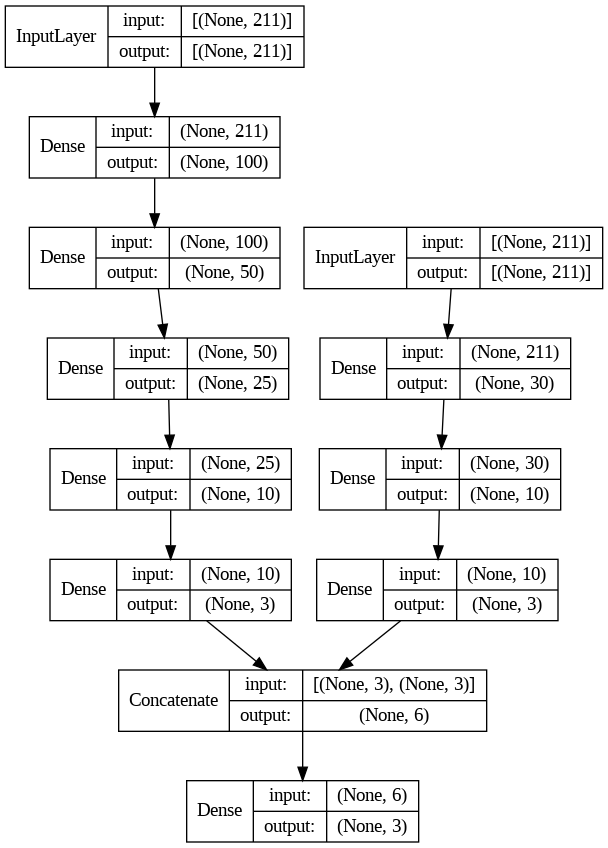

In [ ]:
plot_model(model,show_layer_names=False,show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
fit_model = model.fit(x=[X_train, X_train], y=y_train, batch_size=6, validation_split=0.3, epochs=200)


Epoch 1/200
5/5 [==============================] - 2s 79ms/step - loss: 1.0609 - accuracy: 0.2400 - val_loss: 1.1002 - val_accuracy: 0.3636
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 1.0510 - accuracy: 0.2400 - val_loss: 1.1001 - val_accuracy: 0.3636
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 1.0405 - accuracy: 0.2400 - val_loss: 1.1001 - val_accuracy: 0.3636
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 1.0314 - accuracy: 0.2400 - val_loss: 1.1007 - val_accuracy: 0.3636
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 1.0228 - accuracy: 0.2400 - val_loss: 1.1012 - val_accuracy: 0.3636
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 1.0137 - accuracy: 0.2400 - val_loss: 1.1019 - val_accuracy: 0.3636
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 1.0060 - accuracy: 0.2400 - val_loss: 1.1028 - val_accuracy: 0.3636
Epoch 8/200
5/5 [===

In [ ]:
# Evaluate the model on the test set
model_loss, model_accuracy = model.evaluate(x=[X_test, X_test], y=y_test, verbose=2)

# Print the loss and accuracy
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5700 - accuracy: 0.8125 - 30ms/epoch - 30ms/step
Loss: 0.5700404644012451, Accuracy: 0.8125
